# Laboratório 3
## Disciplina Mineração de Dados
Nomes: <br>
Aimê Gomes da Nobrega (Nro USP 11882429) <br>
Adriane Akemi Yamaguti (Nro USP 11915623)

# Parte1 01 Exploração de Dados

Apresentamos umas primeiras analises exploratorias. Acrescente suas respostas e codigos adicionais solicitados.


## 1. Dados unidimensionais
 
Suponha dois conjuntos de dados, que representam as notas finais em uma dada disciplina de duas salas com 100 alunos. Os dados foram armazenados nos arquivos "notas_salas01.txt" e "notas_salas02.txt". As Notas variam entre 0 a 100.

Imagine que uma pessoa deseje comparar o desempenho das salas de aula. Considera-se que, **quanto mais alunos foram aprovados, melhor o desempenho da sala**. Suponha que para ser aprovado, um aluno deve ter nota maior que 50. 

Como medida inicial de desempenho, essa pessoa calculou a média dos dados através do código abaixo:

In [1]:
import numpy as np
import pandas as pd

salas = []
salas.append(np.loadtxt("notas_sala01.txt"))
salas.append(np.loadtxt("notas_sala02.txt"))

for i in range(0,2):
    print("--- Sala: %d ---" % (i+1))
    print("Média: %f" % np.mean(salas[i]))        

--- Sala: 1 ---
Média: 60.184709
--- Sala: 2 ---
Média: 55.184195


Com base na média, a pessoa concluiu que a sala 1 obteve um melhor desempenho que a sala 2. 

### Questão 01. 
Demonstre e explique o porquê dessa conclusão estar equivocada.
   - Dica: Transforme as estruturas `salas[0]` e `salas[1]` em estruturas do tipo `DataFrame` da biblioteca **pandas** e utilize as funções de histograma e/ou boxplot. Adicionalmente acrescente outras medidas descritivas das notas de cada sala e comente na sua resposta.

<AxesSubplot:>

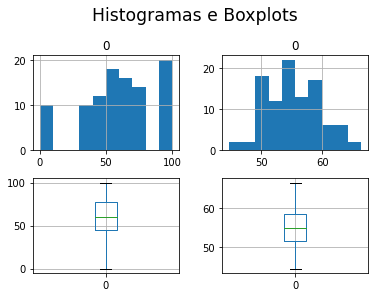

In [2]:
import matplotlib.pyplot as plt
sala1 = pd.DataFrame(salas[0])
sala2 = pd.DataFrame(salas[1])
fig, axes = plt.subplots(2, 2)
hist1 = sala1.hist(bins = 10, ax=axes[0,0])
hist2 = sala2.hist(bins = 10, ax=axes[0,1])
plt.suptitle('Histogramas e Boxplots', x=0.5, y=1.05, ha='center', fontsize='xx-large')
hist1 
hist2
box1 = sala1.boxplot(ax=axes[1,0])
box2 = sala2.boxplot(ax=axes[1,1])
box1
box2

In [3]:
sala1.describe()

,0
count,100.000000
mean,60.184709
std,28.750629
min,0.000000
25%,44.596449
50%,60.367721
75%,77.752831
max,100.000000


In [4]:
sala2.describe()

,0
count,100.000000
mean,55.184195
std,4.501956
min,44.678143
25%,51.524000
50%,54.925262
75%,58.481567
max,66.395197


RESPOSTA:

Usando a função ```describe()```, podemos observar outras medidas descritivas, como valor mínimo, máximo, desvio padrão e quartis.

Dessa forma, é possível notar que a menor nota da sala 1 é 0 e a maior é 100. Já na sala 2, a menor nota é aproximadamente 44.7 e a maior é aproximadamente 66.4.
Além disso, o gráfico de boxplot mostra que a sala 1 possui uma variabilidade dos dados maior (std = 28.750629) que a sala 2 (std = 4.501956). Sendo assim, a melhor forma de analisar o desempenho da sala é usando a mediana que é menos sensível a outliers do que a média.

Com base na mediana, podemos concluir que a sala 1 apresentou um desempenho melhor, pois a sua mediana (60.367721) é maior do que da sala 2 (54.925262).

### Questão 02.
Calcule o número de aprovados em cada uma das salas. Isto é os que obtiveram notas superiores a 50. Conclua então qual sala têm o melhor desempenho.
- Dica: Use a função `argwhere` da biblioteca **numpy**.

In [5]:
print("A sala 1 tem %d aprovados" % len(np.argwhere(np.array(sala1)>50)))
print("A sala 2 tem %d aprovados" % len(np.argwhere(np.array(sala2)>50)))

A sala 1 tem 68 aprovados
A sala 2 tem 90 aprovados


In [6]:
freq_rel1 = len(np.argwhere(np.array(sala1)>50))/len(sala1) * 100
freq_rel2 = len(np.argwhere(np.array(sala2)>50))/len(sala2) * 100

print(f"Porcentagem de aprovados da sala 1: {freq_rel1}%")
print(f"Porcentagem de aprovados da sala 2: {freq_rel2}%")

Porcentagem de aprovados da sala 1: 68.0%
Porcentagem de aprovados da sala 2: 90.0%


RESPOSTA:

Com base nas notas superiores a 50, podemo dizer que a sala 2 teve um desempenho melhor, pois a porcentagem de aprovados é de 90%, enquanto que a sala 1 obteve 68% dos alunos aprovados.

## 2. Dados multidimensionais

Considere o conjunto Iris, disponível no arquivo `iris.data` na pasta.  Ele contém 150 observações sobre 4 características medidas em 3 tipos de flores. 

O trecho de código abaixo carrega o conjunto, armazena-o na variável `iris` e exibe seu conteúdo.



In [7]:
import pandas as pd

iris = pd.read_csv("iris.data", header=None)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



### Questão 03.

Calcule os quatro momentos (média, variância, obliquidade e achatamento) de cada uma das quatro variáveis do conjunto. Comente os resultados encontrados

  - Dica:  cada variável pode ser acessada da forma `iris[i]`, onde `i` é uma das 4 variáveis do conjunto (entre 0 e 3). Utilize as bibliotecas **numpy** para média (mean) e variância (variance) e **Scipy** para obliquidade (skew) e achatamento (kurtosis).

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

--- Variável: 1 ---
Média: 5.843333
Mediana: 5.800000
Variância: 0.681122
Dp: 0.825301
Obliquidade: 0.311753
Achatamento: -0.573568



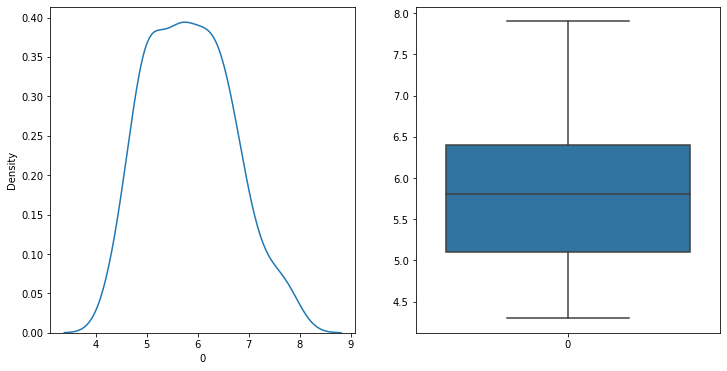

--- Variável: 2 ---
Média: 3.054000
Mediana: 3.000000
Variância: 0.186751
Dp: 0.432147
Obliquidade: 0.330703
Achatamento: 0.241443



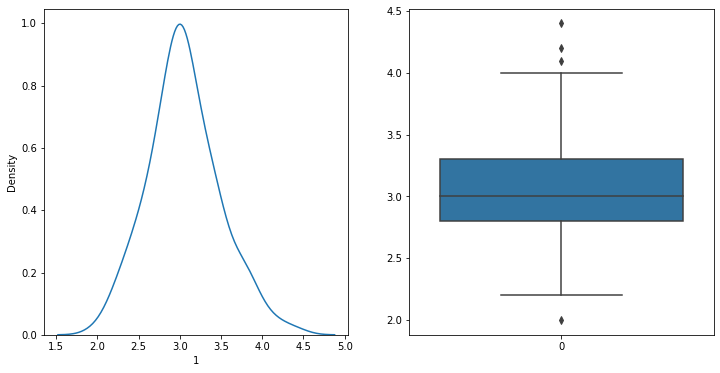

--- Variável: 3 ---
Média: 3.758667
Mediana: 4.350000
Variância: 3.092425
Dp: 1.758529
Obliquidade: -0.271712
Achatamento: -1.395359



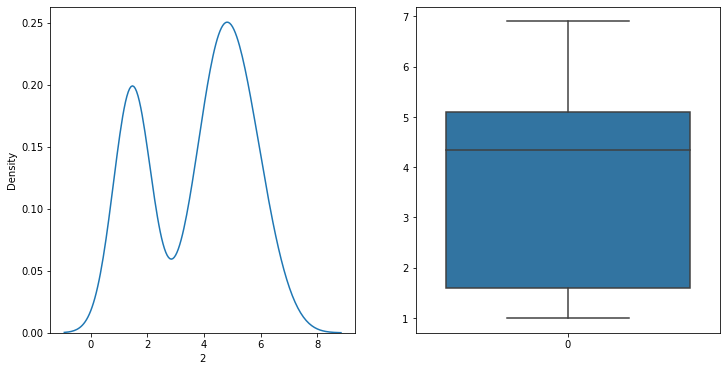

--- Variável: 4 ---
Média: 1.198667
Mediana: 1.300000
Variância: 0.578532
Dp: 0.760613
Obliquidade: -0.103944
Achatamento: -1.335246



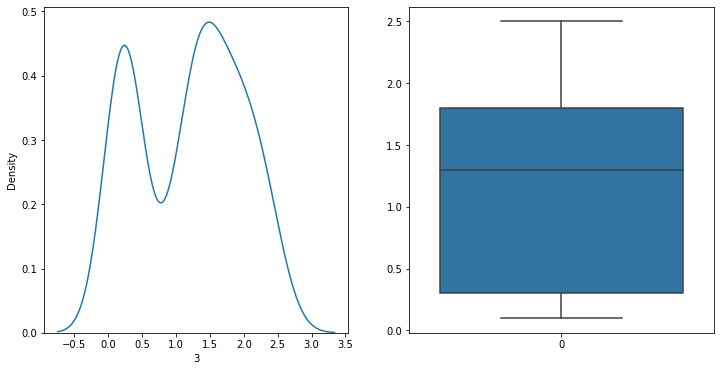

In [9]:
import numpy as np
from scipy.stats import kurtosis, skew

for i in range(0,4):
    fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
    print("--- Variável: %d ---" % (i+1))
    print("Média: %f" % np.mean(iris[i])) 
    print("Mediana: %f" % np.median(iris[i]))
    print("Variância: %f" % np.var(iris[i]))
    print("Dp: %f" % np.std(iris[i]))
    print("Obliquidade: %f" % skew(iris[i])) 
    print("Achatamento: %f\n" % kurtosis(iris[i])) 
    #     sns.distplot(iris[i],hist=False)
    sns.kdeplot(iris[i],  ax=axs[0])
    sns.boxplot(data= iris[i],  ax=axs[1])
    plt.show()

RESPOSTA:

Para a variável 1, nota-se que a média (5.843333) é levemente maior que a mediana (5.800000) e a sua obliquidade é maior que 0, evidenciando a uma simetria positiva ou à direita. Podemos perceber que a variância e o desvio padrão são altos, mostrando uma certa variabilidade dos dados.
O achatamento representa uma distribuição platicúrtica, pois -0.573568 < 0.

A variável 2 apresenta uma assimetria positiva ou à direita, pois a média (3.054000) é levemente maior que a mediana (3.000000) e isto pode ser observado também pela a sua medida de skewness que é maior que 0. Já a medida de curtose, indica que a distribuição é leptocúrtica, pois 0.241443 > 0. O boxplot nos mostra a presença de outliers e a variância e o desvio padrão indicam pouca variabilidade dos dados. Além disso, apesar de não apresentar simetria, a variável 2 é a que mais se aproxima de uma distribuição normal.

As variáveis 3 e 4 possuem a distribuição bimodal. Existe uma certa distância entre as duas modas, no entanto, a variável 3 possui uma distância menor, indicando que as duas subpopulações são mais semelhantes do que as subpopulações da variável 4. Pelo gráfico de densidade, nota-se que a subpopulação da variável 3 é mais heterogênea do que a variável 4.



---

### Questão 04.

Calcule o histograma e o boxplot de cada uma das quatro variáveis do conjunto. Analise se os dados estão centrados (simetria) e estime qual intervalo contém 50% dos dados (intervalo entre primeiro e terceiro quartil). Comente na sua resposta.


Para a variável 1:
O intervalo que contém 50% dos dados é:
[5.1 6.4]
Para a variável 2:
O intervalo que contém 50% dos dados é:
[2.8 3.3]
Para a variável 3:
O intervalo que contém 50% dos dados é:
[1.6 5.1]
Para a variável 4:
O intervalo que contém 50% dos dados é:
[0.3 1.8]
Nenhuma das variáveis apresenta simetria, porém a mais próxima de um comportamento simétricos é a variável 2.


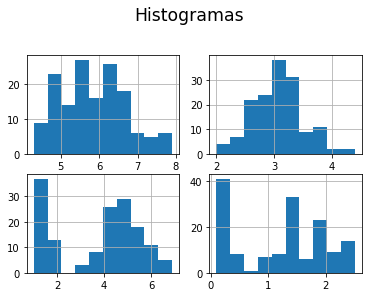

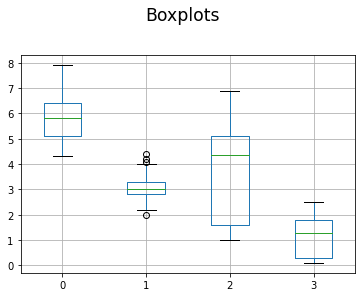

In [10]:
fig, axes = plt.subplots(2, 2)
iris[0].hist(bins = 10, ax=axes[0,0])
iris[1].hist(bins = 10, ax=axes[0,1])
iris[2].hist(bins = 10, ax=axes[1,0])
iris[3].hist(bins = 10, ax=axes[1,1])
plt.suptitle('Histogramas', x=0.5, y=1.05, ha='center', fontsize='xx-large')

fig, axes = plt.subplots(1, 1)
plt.suptitle('Boxplots', x=0.5, y=1.05, ha='center', fontsize='xx-large')
iris.boxplot()

for i in range(0,4):
  print('Para a variável %d:'% (i+1))
  print('O intervalo que contém 50% dos dados é:')
  print(np.percentile(iris[i], [25,75]))


print('Nenhuma das variáveis apresenta simetria, porém a mais próxima de um comportamento simétricos é a variável 2.')

In [11]:
iris.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


RESPOSTA:

Podemos utilizar a função ```describe ()``` para verificar os valores mostrados no boxplot. Dessa forma, para a variável 1, tanto o histograma e o boxplot evidenciam uma simetria positiva, já que a mediana está mais próxima do terceiro quartil. Nota-se também que a distribuição está mais próxima da parte inferior do gráfico, indicando que os valores estão mais concentrados no mínimo.

Já a variável 2, apresenta alguns valores discrepantes e pouca variabilidade nos dados. Além disso, possui uma distribuiçào que mais se aproxima de uma normal padrão.

Observa-se a presença de dos subgrupos nas variáveis 3 e 4. Além disso, ambas possuem a mediana mais próxima do terceiro quartil, o que indica uma assimetria negativa  à esquerda. Também vale ressaltar que a variável 3 é a que possui mais variabilidade nos dados.

# Parte 2 Correlação e Visualização

Nesse exercício iremos trabalhar com o conjunto *Iris*. Esse conjunto possui 150 observações de 5 variáveis, sendo que a última variável representa a classe.

### Questão 01.

Leia os dados (`pandas.read_csv`) do arquivo `iris.csv` e separe o conjunto em atributos e classe. Comente os resultados encontrados.

In [12]:
import pandas as pd 

iris = pd.read_csv('iris.csv')
iris_atr = iris.drop('type', axis=1)
iris_type = iris['type']

print("Atributos:")
print(iris_atr)
print("\nClasse:")
print(iris_type)
print("\nTipos de flor:")
print(iris_type.unique())

Atributos:
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

Classe:
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: type, Length

COMENTE:

O conjunto de dados ```iris.csv``` possui os atributos das flores, tais como: comprimento da pétala, largura da pétala, comprimento da sépala e largura da sépala, enquanto que a classe representa o tipo de flor (Iris-setosa, Iris-versicolor e Iris-virginica.

Em aprendizado de máquina, separamos os atributos das classes com o objetivo de aprender as relações entre os atributos e a classe e prever a classe de novos exemplos com base em seus atributos. 

### Questão 02.

Calcule a matriz de covariância dos dados (`numpy.cov`) e visualize-a através de um heatmap (`seaborn.heatmap`). Ative a exibição dos valores de cada célula do heatmap. Comente os resultados encontrados.

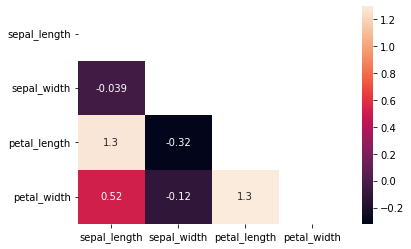

In [13]:
import numpy as np 
import seaborn as sns 

# Calculando a matriz de variâncias e covariâncias
cov = np.cov(iris_atr, rowvar = False)

# Plotando o heatmap com a biblioteca seaborn
xticklabels = iris_atr.columns
yticklabels = iris_atr.columns

mask = np.triu(cov)
sns.heatmap(cov, annot = True,
            xticklabels=xticklabels, 
            yticklabels=yticklabels,
           mask= mask);

COMENTE:

No gráfico acima, observa-se que os valores de covariância positivos são representados em tons mais claros, enquanto os valores negativos são representados em tons mais escuros. É possível notar uma correlação positiva entre as variáveis 'petal_length' e 'petal_width', enquanto que as variáveis 'sepal_length' e 'sepal_width' apresentam uma correlação negativa.

### Questão 03.

Agora calcule a matriz de correlação (`pandas.DataFrame.corr`) utilizando o método de Pearson, gerando um heatmap da matriz. Esse método apresenta alguma vantagem com o método da questão anterior?. Comente seus resultados

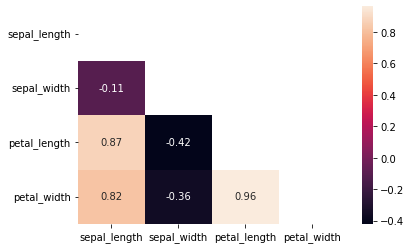

In [14]:
# Calculando correlação com o método de Pearson
corr = iris_atr.corr(method = 'pearson')

# Plotando o heatmap com a biblioteca seaborn
mask = np.triu(corr)
sns.heatmap(corr, annot = True, mask= mask);


COMENTE:

No gráfico acima, observa-se que os valores de covariância positivos são representados em tons mais claros, enquanto os valores negativos são representados em tons mais escuros. É possível notar que as variáveis 'petal_length' e 'petal_width' estão fortemente correlacionados. Já as variáveis 'sepal_length' e 'sepal_width' estão fracamente relacionados.

A correlação de Pearson é usada para avaliar a relação entre duas variáveis contínuas, supondo que os dados estão normalmente distribuídos. Outras suposições que devem ser incluídas são a linearidade (assume uma relação de linha reta entre cada uma das duas variáveis) e a homocedasticidade (assume que os dados são igualmente distribuídos sobre a linha de regressão).

Comparando com o método da questão anterior, podemos dizer que a covariância informa a direção da relação entre duas variáveis, enquanto que a correlação de Pearson apresenta uma vantagem, pois fornece uma indicação de quão forte é a relação entre as duas variáveis, além da direção das variáveis correlacionadas.

### Questão 04.

Agora calcule as matrizes de correlação utilizando os métodos de Kendall e Spearman. Exiba seus heatmaps. Comente seus resultados.

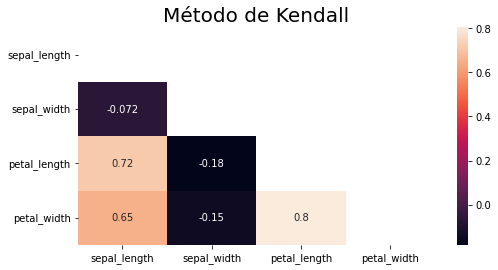

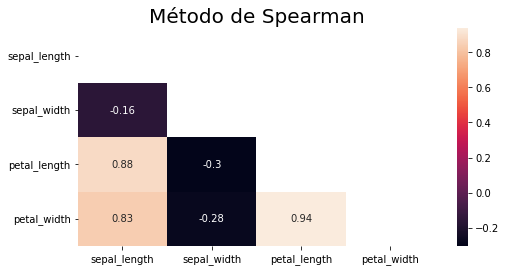

In [15]:
import matplotlib.pyplot as plt

# Cauculando correlação com o método de Kendall e Spearman
corr_kendall = iris_atr.corr(method = 'kendall')
corr_spearman = iris_atr.corr(method = 'spearman')

# Plotando os heatmaps com a biblioteca seaborn
fig, ax =plt.subplots(ncols=1, figsize=(8, 4))
mask = np.triu(corr_kendall)
plt.title('Método de Kendall', fontsize = 20)
sns.heatmap(corr_kendall, annot = True, mask= mask)

fig, ax =plt.subplots(ncols=1, figsize=(8, 4))
mask = np.triu(corr_spearman)
plt.title('Método de Spearman', fontsize = 20)
sns.heatmap(corr_spearman, annot = True, mask= mask);


COMENTE:

Em ambos os gráficos, observa-se que os valores de covariância positivos são representados em tons mais claros, enquanto os valores negativos são representados em tons mais escuros. É possível notar que as variáveis 'petal_length' e 'petal_width' estão fortemente correlacionados. Já as variáveis 'sepal_length' e 'sepal_width' estão fracamente relacionados.

Ao contrário da correlação de Pearson, a correlação de Spearman não requer a suposição de que a relação
entre as variáveis seja linear e nem que as variáveis sejam quantitativas. Já ao método de Kendall, pode ser usada para
associar variáveis ordinais. Além disso, este pode ser generalizado para um coeficiente de correlação parcial. 

### Questão 05.

Determine os pares de variáveis que apresentam maior e menor correlação de spearman. Depois produza scatter plots (`matplotlib.pyplot.scatter`) desses pares de variáveis. Comente como os dados estão distribuídos nos gráficos.

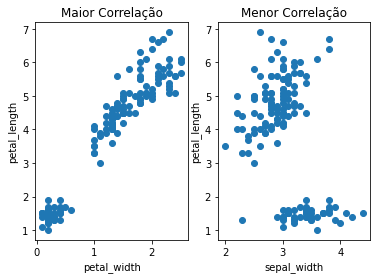

In [16]:
# Podermos observar que a maior correlação é entre petal_width e petal_length, logo:
plt.subplot(1,2,1)
plt.scatter(iris_atr['petal_width'],iris_atr['petal_length'])
plt.title("Maior Correlação")
plt.xlabel("petal_width")
plt.ylabel("petal_length")

# Podermos observar que a maior correlação é entre sepal_width e petal_length, logo:
plt.subplot(1,2,2)
plt.scatter(iris_atr['sepal_width'],iris_atr['petal_length'])
plt.title("Menor Correlação")
plt.xlabel("sepal_width")
plt.ylabel("petal_length");

O gráfico de maior correlação possui uma relação linear positiva. Nota-se a presença de 2 subgrupos, sendo um deles com maior concentração em largura e comprimento da pétala menores e o outro com concentração em largura e comprimento da pétala maiores.

O gráfico de menor correlação, apresenta 2 subgrupos sendo um concentrado em comprimento maior da pétala e largura menor da sépala. Já o outro, concentra-se em comprimento menor da pétala e largura maior da sépala.

### Questão 06.

Produza um diagrama de torta (`matplotlib.pyplot.pie`) com a distribuição das classes desse conjunto de dados. Comente seus resultados.

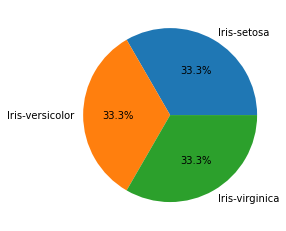

In [17]:
# Criando um diagrama de torta com a distribuição das classes:
plt.pie(iris_type.value_counts(), labels =iris_type.unique(), autopct='%1.1f%%' );

COMENTE:

A distribuição dos tipos de flores estão igualmente distribuídos, no qual cada um representa 33,3%.

# Parte 3 Seleção de variáveis

Nesse exercício utilizaremos um dataset para classificação binária. No total são 19 variáveis de entrada e 1 variável de saída. O dataset pode ser encontrado no arquivo "dataset_hepatitis.csv".

Existem valores faltantes nesse dataset, representados pelo caractere "?".

**Há material complementar disponível para resolução desse exercício. Acesse o arquivo "Transformações em dados heterogeneos" antes de prosseguir.**

**Os códigos devem ser revisados e então corregir os erros que possam existir.**

### Questão 01.

Carregue o dataset (`pandas.read_csv`) e comente os valores ausentes nas variáveis. Utilize o parâmetro `na_values`.

In [ ]:
import pandas as pd

hepatitis = pd.read_csv('dataset_hepatitis.csv', na_values = '?')
hepatitis.head()
# hepatitis.isna().sum()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1.0,85.0,18.0,4.0,NaN,no,1
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135.0,42.0,3.5,NaN,no,1
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96.0,32.0,4.0,NaN,no,1
3,31,female,NaN,yes,no,no,no,yes,no,no,no,no,no,0.7,46.0,52.0,4.0,80.0,no,1
4,34,female,yes,no,no,no,no,yes,no,no,no,no,no,1.0,NaN,200.0,4.0,NaN,no,1


In [ ]:
def print_null_values(df):
    """
    Esta função recebe um dataframe do pandas e imprime informações sobre os valores nulos.
    """
    null_values = df.isnull().sum() # Calcula o número de valores nulos em cada coluna
    total_values = df.count() # Calcula o número total de valores em cada coluna
    null_percent = round((null_values / total_values) * 100, 2) # Calcula a porcentagem de valores nulos em cada coluna
    
    # Cria um dataframe para armazenar as informações
    null_info = pd.concat([null_values, total_values, null_percent], axis=1, keys=['Nulos', 'Total', '% Nulos'])
    
    # Imprime as informações
    return null_info
print_null_values(hepatitis)

,Nulos,Total,% Nulos
AGE,0,155,0.00
SEX,0,155,0.00
STEROID,1,154,0.65
ANTIVIRALS,0,155,0.00
FATIGUE,1,154,0.65
MALAISE,1,154,0.65
ANOREXIA,1,154,0.65
LIVER_BIG,10,145,6.90
LIVER_FIRM,11,144,7.64
SPLEEN_PALPABLE,5,150,3.33


COMENTE:

Pelo resultado obtido, é possível observar que algumas colunas possuem um número significativo de valores nulos, como por exemplo PROTIME, que possui 67 valores nulos, comprometendo 76% do atributo. Já outras colunas possuem poucos valores nulos, como AGE e ANTIVIRALS, que não possuem nenhum valor nulo.  É importante verificar a quantidade de valores nulos em cada coluna, pois isso pode afetar a qualidade da análise e da modelagem dos dados. Dependendo da quantidade de valores nulos, pode ser necessário realizar algum tipo de tratamento, como preencher os valores nulos com algum valor ou remover as observações que possuem valores nulos.



---

### Questão 02.

Nessa questão, você irá fazer o pré-processamento dos dados.

Você deve:


*   **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média (`sklearn.impute.SimpleImputer`). Depois padronize o intervalo dessas variáveis (`sklearn.preprocessing.StandardScaler`)
*   **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia de mais frequentes (`sklearn.impute.SimpleImputer`). Depois converta os dados categóricos para uma representação numérica (`sklearn.preprocessing.OneHotEncoder`),

Lembre-se de utilizar as classes `sklearn.pipeline.Pipeline` e `sklearn.compose.ColumnTransformer` conforme consta no material complementar.
Comente os resultados obtidos.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

import numpy as np

# define vetor de com os nomes das variaveis numericas e categoricas
var_numericos = ['AGE','BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN','PROTIME']
var_categoricos = ['SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER_BIG','LIVER_FIRM','LIVER_FIRM','SPLEEN_PALPABLE','SPIDERS','ASCITES','VARICES','HISTOLOGY']

# cria os pipelines
pip_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

pip_categorico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

# define as transformacoes no dados
transformacao = ColumnTransformer(
    transformers=[
        ('transformacao numerica', pip_numerico, var_numericos),
        ('transformacao categorica', pip_categorico, var_categoricos),        
    ])

# aplica as transformacoes
dados_transformados = transformacao.fit_transform(hepatitis)
dados_transformados_com_classe = np.c_[dados_transformados, hepatitis['Class']]
dados_transformados_com_classe.round(2)

array([[-0.89, -0.36, -0.44, ...,  1.  ,  0.  ,  1.  ],
       [ 0.7 , -0.45,  0.64, ...,  1.  ,  0.  ,  1.  ],
       [ 2.94, -0.61, -0.2 , ...,  1.  ,  0.  ,  1.  ],
       ...,
       [ 1.58, -0.53, -0.66, ...,  0.  ,  1.  ,  1.  ],
       [ 0.94,  0.06, -0.53, ...,  0.  ,  1.  ,  1.  ],
       [ 0.14, -0.19, -0.12, ...,  0.  ,  1.  ,  0.  ]])

In [ ]:
# retornando a descrição dos atributos
nomes = []
# Variáveis numéricas não tem alteração de tamanho, logo:
nomes = nomes + var_numericos

# Para os dados categóricos devemos acessar o transformador:
transformacao_categorica = transformacao.transformers_[1]
# Depois o pipeline
pip_categorico = transformacao_categorica[1]
# E finalmente o onehot
transf_onehot = pip_categorico.named_steps['onehot']
# Para acessar o nome das variáveis usamos o método get_feature_names()
nomes = nomes + (transf_onehot.get_feature_names_out().tolist())

nomes.append("classe")

dataframe_processado = pd.DataFrame(data = dados_transformados_com_classe, columns=nomes)

In [ ]:
transformacao

ColumnTransformer(transformers=[('transformacao numerica',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['AGE', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT',
                                  'ALBUMIN', 'PROTIME']),
                                ('transformacao categorica',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE',
                                  'MALAISE', 'ANOREXIA', 'LIVER_BIG',
                                  'LIVER_FIRM', 'LIVER_FIRM', 'SPLEEN_PALPABLE',
                                  'SPIDERS', 'ASCITES', 'VARICES',
                                  'HISTOLOGY'])])

In [ ]:
dataframe_processado

,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,x0_female,x0_male,x1_no,x1_yes,...,x9_yes,x10_no,x10_yes,x11_no,x11_yes,x12_no,x12_yes,x13_no,x13_yes,classe
0,-0.894192,-0.360938,-4.394144e-01,-0.769834,0.297246,-4.146013e-16,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.702579,-0.445364,6.415347e-01,-0.497704,-0.516084,-4.146013e-16,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,2.938059,-0.614217,-2.016056e-01,-0.611092,0.297246,-4.146013e-16,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.814353,-0.614217,-1.282555e+00,-0.384316,0.297246,1.058919e+00,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.574838,-0.360938,-3.072242e-16,1.293820,0.297246,-4.146013e-16,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.383225,5.211214,-3.072242e-16,1.770048,-0.841416,-6.915795e-01,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
151,0.223548,-0.445364,4.469639e-01,0.636172,0.785243,-4.146013e-16,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
152,1.580803,-0.529791,-6.556042e-01,-0.747157,0.459911,-4.146013e-16,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
153,0.942095,0.061195,-5.258903e-01,-0.758496,0.459911,-8.082794e-01,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0


COMENTE:

Esse código cria pipelines de pré-processamento de dados para variáveis numéricas e categóricas do dataset "hepatitis", a fim de aplicar a sequência de transformações de forma organizada. 


A transformação numérica é realizada pela aplicação de um imputador que preenche os valores faltantes com a média dos valores da coluna e depois faz uma normalização dos valores através do StandardScaler. Já a transformação categórica é realizada pela aplicação de um imputador que preenche os valores faltantes com o valor mais frequente da coluna e depois faz uma codificação das variáveis categóricas através do OneHotEncoder, criando novas colunas binárias.

Em seguida, é criado um objeto ColumnTransformer que combina as duas transformações em uma única transformação e aplica essa transformação aos dados do dataset "hepatitis". O resultado é armazenado em "dados_transformados", que é um array numpy contendo as variáveis transformadas. Finalmente, é criado um novo array numpy chamado "dados_transformados_com_classe" que inclui a variável alvo ("Class") junto com as variáveis transformadas.

A seguir, ele aplica as transformações e pipelines criados anteriormente.

### Questão 03.

Determine as 10 variáveis mais relevantes do conjunto (lembre-se de concatenar a variável alvo no dataset transformado). Você pode utilizar a matriz de covariância (`numpy.cov`), correlação (`pandas.DataFrame.corr`), `scatterplot`, etc. Escreva o codigo e justifique sua escolha.
Lembre-se que heatmaps (`seaborn.heatmap`) podem auxiliar a visualização. Comente seus resultados

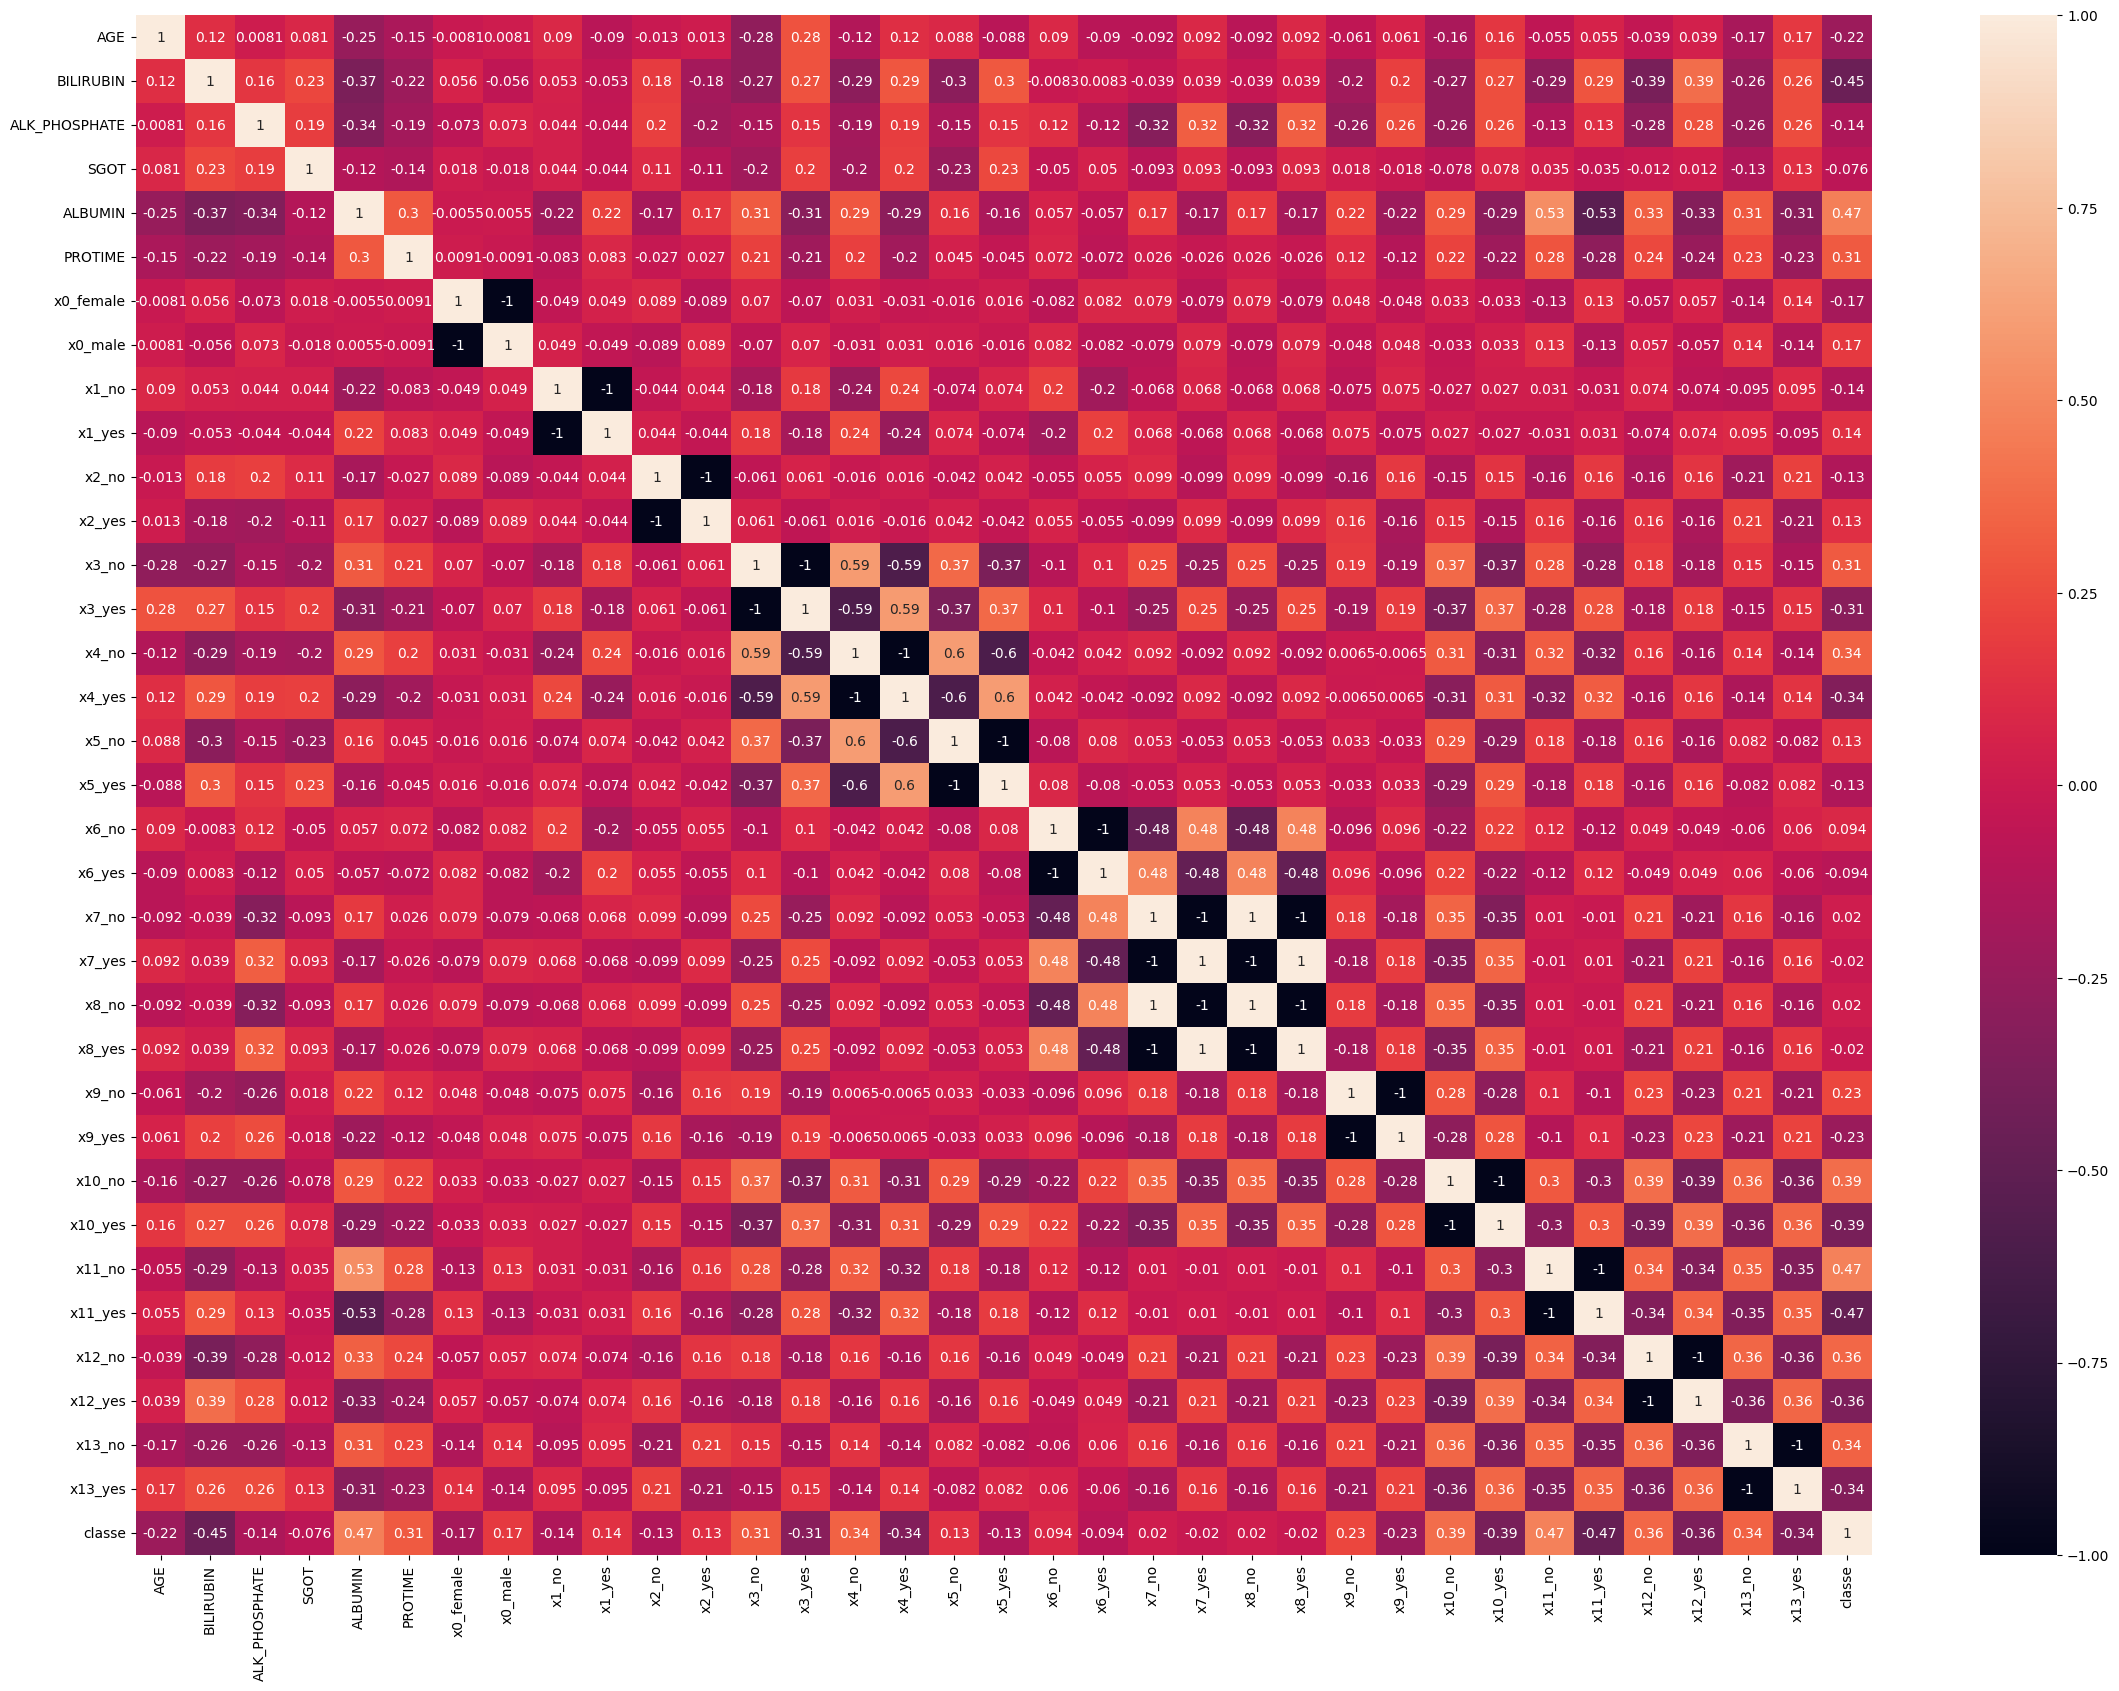

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
# Calculando a matriz de correlação
corr = dataframe_processado.corr(method = 'pearson')

# Plotando o heatmap com a biblioteca seaborn   
f, ax = plt.subplots(figsize=(28, 20))
ax = sns.heatmap(corr, annot = True)

In [ ]:
# as 10 variáveis mais correlacionadas com a variável classe
top10 = corr['classe'].abs().sort_values(ascending=False).head(11)
top10

classe       1.000000
x11_yes      0.469334
x11_no       0.469334
ALBUMIN      0.465827
BILIRUBIN    0.450470
x10_no       0.389137
x10_yes      0.389137
x12_no       0.362385
x12_yes      0.362385
x4_no        0.339530
x4_yes       0.339530
Name: classe, dtype: float64

In [ ]:
#Selecionamos as 10 covariáveis com maior correlação com a variável resposta (positiva ou negativa), isso ajudaria na explicabilidade da variância da variável resposta e
#  com o uso da técnica de PCA evitamos a multicolinearidade. 
#Apesar de que calcular a correlação entre variáveis numéricas e categóricas não parece ser uma abordagem ideal/correta.
print("Selecionamos as 10 covariáveis com maior correlação com a variável resposta (positiva ou negativa), isso ajudaria na explicabilidade da variância da variável resposta e com o uso da técnica de PCA evitamos a multicolinearidade. Apesar de que calcular a correlação entre variáveis numéricas e categóricas não parece ser uma abordagem ideal/correta.")

Selecionamos as 10 covariáveis com maior correlação com a variável resposta (positiva ou negativa), isso ajudaria na explicabilidade da variância da variável resposta e com o uso da técnica de PCA evitamos a multicolinearidade. Apesar de que calcular a correlação entre variáveis numéricas e categóricas não parece ser uma abordagem ideal/correta.


COMENTE:

Foram selecionados 10 atributos com maior correlação pearson com a variável resposta "classe", seja positiva ou negativa. 



---

### Questão 04.

Com as 10 varíaveis determinadas na questão anterior, crie um novo conjunto de dados.

Lembre-se que o numpy permite indexar colunas/linhas utilizando arrays. Comente seus resultados.

In [ ]:
top10_idx = top10.index
dataframe_reduzido = dataframe_processado[top10_idx]
Xr = dataframe_reduzido.drop(columns='classe').to_numpy()
Y = dataframe_processado['classe'].to_numpy()

In [ ]:
dataframe_reduzido

,classe,x11_yes,x11_no,ALBUMIN,BILIRUBIN,x10_no,x10_yes,x12_no,x12_yes,x4_no,x4_yes
0,1.0,0.0,1.0,0.297246,-0.360938,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,-0.516084,-0.445364,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.297246,-0.614217,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.297246,-0.614217,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.297246,-0.360938,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
150,0.0,1.0,0.0,-0.841416,5.211214,0.0,1.0,0.0,1.0,0.0,1.0
151,1.0,0.0,1.0,0.785243,-0.445364,1.0,0.0,1.0,0.0,1.0,0.0
152,1.0,0.0,1.0,0.459911,-0.529791,0.0,1.0,1.0,0.0,0.0,1.0
153,1.0,0.0,1.0,0.459911,0.061195,0.0,1.0,0.0,1.0,1.0,0.0


A partir das 10 variáveis escolhidas, criamos um novo conjunto de dados. Do dataframe reduzido, são extraídas as variáveis independentes Xr e a variável independente Y.

COMENTE:

### Questão 05.

Reduza a dimensionalidade do conjunto de dados criado utilizando a técnica PCA (`sklearn.decomposition.PCA`). Reduza a dimensionalidade de forma que no mínimo 80% da variância dos dados seja mantida (atente-se ao atributo  `explained_variance_ratio_`). Depois exiba os eixos principais. Comente seus resultados.

In [ ]:
from sklearn.decomposition import PCA

X = dataframe_processado.drop(columns='classe').to_numpy()

pca = PCA()
pca.fit(X)

PCA()

In [ ]:
acumulado = 0;
idx = 0;
indices = []
valores = []
for contribuicao in pca.explained_variance_ratio_:
  if (acumulado<=0.8):
    idx=idx+1
    acumulado += contribuicao
    indices.append(idx)
    valores.append(acumulado * 100)
    print('acumulado {:d}: {:.2f}%'.format(idx,acumulado*100))

acumulado 1: 24.30%
acumulado 2: 35.00%
acumulado 3: 44.44%
acumulado 4: 53.02%
acumulado 5: 60.46%
acumulado 6: 66.80%
acumulado 7: 72.63%
acumulado 8: 77.42%
acumulado 9: 81.62%


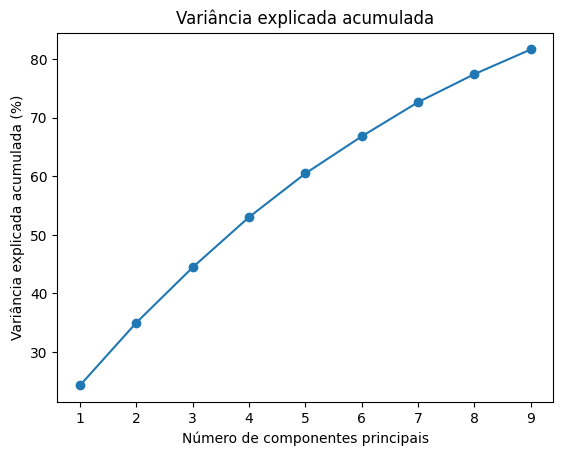

In [ ]:
plt.plot(indices, valores, 'o-')
plt.title('Variância explicada acumulada')
plt.xlabel('Número de componentes principais')
plt.ylabel('Variância explicada acumulada (%)')
plt.show()

In [ ]:
V = pca.components_
Zp = np.dot(X,V)

# m<p: as m primeiras componentes que somadas mantem 80% da variancia
Zm = Zp[:,0:idx]

# os m autovetores principais
pd.DataFrame(Zm)

,0,1,2,3,4,5,6,7,8
0,-0.077277,0.133102,0.038501,-1.201773,0.502868,0.152714,-0.903454,0.586518,0.800859
1,-0.363653,1.107912,0.242491,0.351789,-0.035786,-1.167200,-0.482484,0.165549,0.627563
2,0.643261,1.944533,0.420953,0.214255,-1.593462,-1.449304,-0.408536,0.499714,0.316350
3,0.281649,0.348862,-1.358864,-1.344395,0.475771,-0.608653,-0.623303,0.714481,0.297792
4,0.537433,0.604814,-0.976073,0.758695,0.600267,0.418741,-0.800421,0.891599,0.251316
...,...,...,...,...,...,...,...,...,...
150,0.468136,-1.605614,2.119310,1.287708,0.925644,1.288950,-0.940216,0.060525,0.592609
151,0.129218,1.217253,-0.727197,0.562121,0.013777,0.160787,0.460536,1.369464,-0.012511
152,0.669962,1.543804,-0.065041,-0.638935,-0.661643,-1.005039,0.619416,0.787798,0.975641
153,0.687043,0.784577,1.061184,-0.830541,-0.393940,0.026108,-0.946174,0.030635,0.699444


COMENTE:

Zp é a matriz resultante da multiplicação da matriz de variáveis independentes X pela matriz de componentes principais V obtida através da análise de componentes principais (PCA). Representa a projeção dos dados originais no novo espaço de dimensões reduzidas definido pelos componentes principais. Escolhemos utilizar as 9 componentes principais, resultando na matrix Zm.

### Questão 06.

Teste um modelo de classificação (através da função `model_tester`) nos conjuntos criados nas questões 4 e 5. Houve redução expressiva da acurácia?. Comente seus resultados.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# - Descrição:  Função que testa um modelo de classificação (MLP). 
# - Parâmetros: Variáveis de entrada (inputs) e a variável alvo (target).
# - Retorna:    Não retorna nenhum valor. Mas imprime a acurácia do modelo.
def model_tester(inputs, target):
  clf = MLPClassifier(hidden_layer_sizes=(5,), random_state=0, max_iter=10000)
  scores = cross_val_score(clf, inputs, target, cv=10)
  print("Score do classificador: %.2f" % (scores.mean()*100))

In [ ]:
# conjunto de dados com todas variaveis
model_tester(X,Y)

Score do classificador: 82.50


In [ ]:
# conjunto de dados com redução atraves das maiores correlações (pearson)
model_tester(Xr,Y)

Score do classificador: 82.54


In [ ]:
# conjunto de dados com redução PCA (9 componentes principais)
model_tester(Zm,Y)

Score do classificador: 80.00


COMENTE:

Utilizamos MLPClassifier para a tarefa de classificação. Ao comparar a acurácia do modelo treinado com todas as variáveis (82.50%) com a acurácia dos modelos treinados após as reduções de dimensão, percebe-se que a redução de variáveis através das maiores correlações (82.54%) não teve impacto significativo na acurácia do modelo. No entanto, a redução de dimensão utilizando PCA (80.00%) resultou em uma redução expressiva na acurácia do modelo.